In [ ]:
import numpy as np
import matplotlib.pyplot as plt

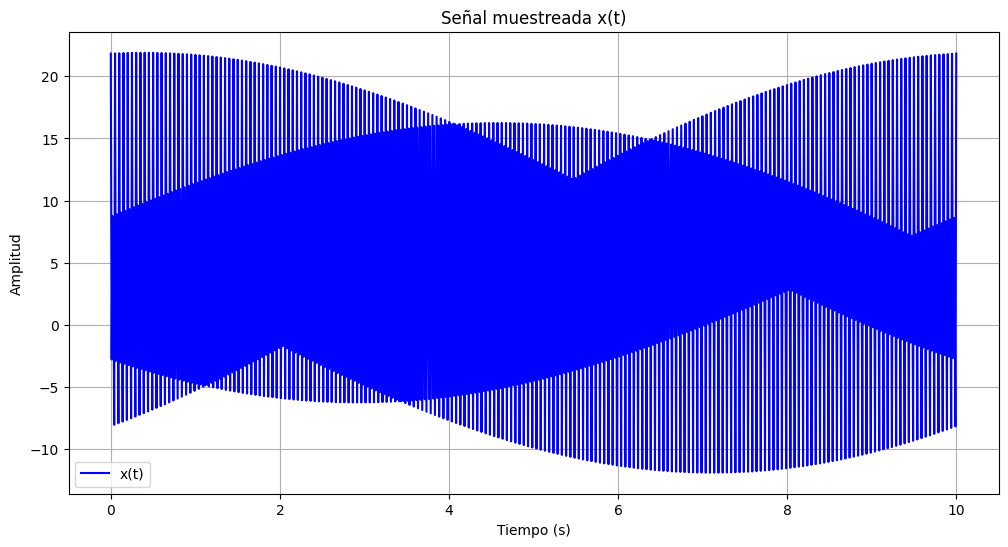

In [ ]:
k = 14
fs = 100
t_total = 10
t = np.linspace(0, t_total, int(fs * t_total))

x_t = 4 * np.sin(40 * np.pi * t + (np.pi / 4)) + k * np.cos(80 * np.pi * t) + 5

plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label="x(t)", color="blue")
plt.title("Señal muestreada x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()



In [ ]:
from mmap import ACCESS_DEFAULT
def welch(x, fs, M, S, window_function):
    N = len(x)
    w = window_function(M)
    step = M - S
    k = (N - S) // step
    ac = np.zeros(M)

    for i in range(k):
        empi = i * step
        seg = x[empi:empi + M]
        vent = seg * w
        fft_segment = np.fft.fft(vent, n=M)
        periodograma = (1 / (fs * np.sum(w**2))) * np.abs(fft_segment)**2

        ac += periodograma
        acf = ac / k

        f = np.fft.fftfreq(M, d=1/fs)[:M//2]

    return f, acf[:M//2]


In [ ]:
window_function = np.bartlett

k = 14
t = np.linspace(0, 10, fs * 10)  # 10 segundos de duración
x_t = 4 * np.sin(40 * np.pi * t + (np.pi / 4)) + k * np.cos(80 * np.pi * t) + 5

